In [1]:
# %matplotlib notebook

<IPython.core.display.Javascript object>


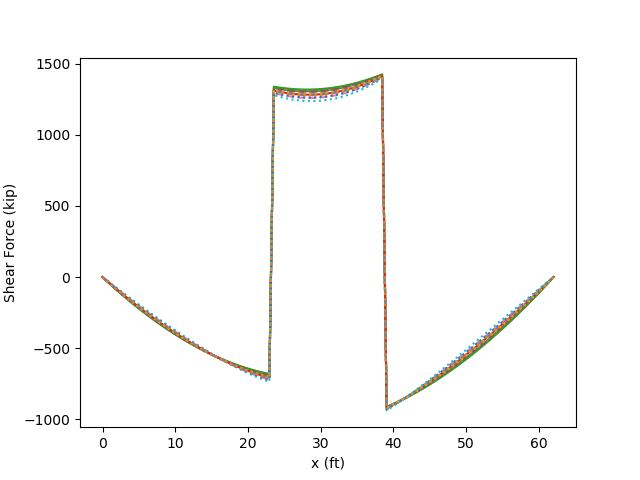

<IPython.core.display.Javascript object>


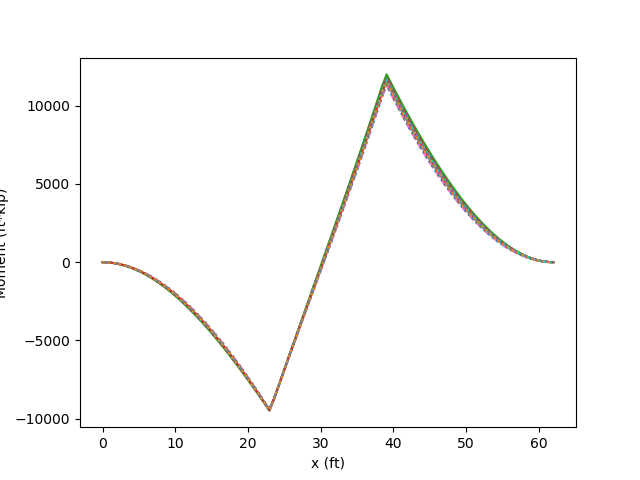

<IPython.core.display.Javascript object>


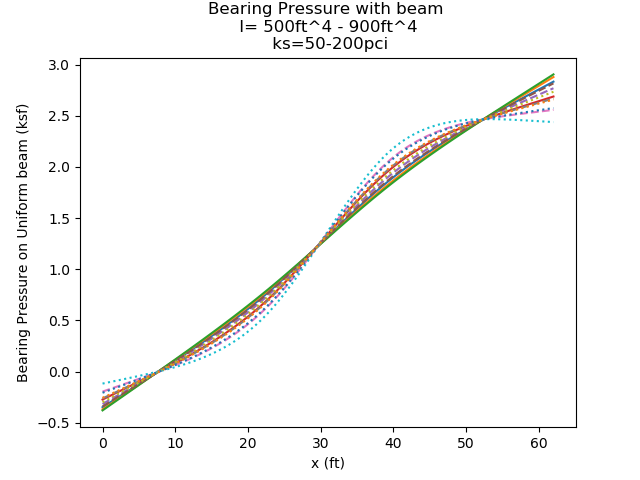

Text(0.5, 1.0, 'Bearing Pressure with beam \n I= 500ft^4 - 900ft^4 \n ks=50-200pci')

In [5]:
import IPython
import numpy as np
# Inputs: Geometry
L_ft = 62 #[ft]
W_ft = 32 #[ft]
T_ft = 4.0 #[ft]
E_ksi = 5700 #[ksi]
#ks_pci = [100,150,200]  #[pci]
ks_pci = [50,100,150,200, 250, 300]
I_ft4 = [ 500,700, 900]  #[ft^4]
#I_ft4 = W_ft*T_ft**3/12

# Inputs: Loading
# Distributed Load 1
a_ft = 0 #[ft] dista_ftnce from edge of Beam to Beginning of distriButed load
e = L_ft #[ft] distance from edge of Beam to end of distriButed load
w_kipPerFt = 36.1 #[kips/ft]
geoList_dl_1 = [a_ft,e,w_kipPerFt]
# Point Load 1
a_ft = 23 #[ft]
W_kip = -2025 #[kips]
geoList_pl_1 = [a_ft,W_kip]#[Distance to load[ft],load [kips]]
# Point Load 2
a_ft = 39 #[ft]
W_kip = 2350 #[kips]
geoList_pl_2 = [a_ft,W_kip]#[Distance to load[ft],load [kips]]

import BOEF_Func as BF

Rslts = []; #will be in format [SFvX, SFmX, SFqX, SFDX, SfQx]
InputRecord = [];
for ks in ks_pci:
    for I in I_ft4:
        inptLst = inputList = [L_ft,W_ft,T_ft,E_ksi,ks,I]
        [sumz,editedInputs] = BF.Main_BOEF(inptLst,geoList_dl_1,geoList_pl_1,geoList_pl_2)
        Rslts.append(sumz)
        InputRecord.append(editedInputs)

x_ft = editedInputs[6]
#Plotit
import matplotlib.pyplot as plt
plt.figure()
plt.plot(x_ft,Rslts[0][0],x_ft,Rslts[1][0],x_ft,Rslts[2][0],x_ft,Rslts[3][0])
plt.plot(x_ft,Rslts[4][0],x_ft,Rslts[5][0],x_ft,Rslts[6][0],x_ft,Rslts[7][0],linestyle = '--')
plt.plot(x_ft,Rslts[8][0],x_ft,Rslts[9][0],x_ft,Rslts[10][0],x_ft,Rslts[11][0],linestyle = ':')
plt.xlabel('x (ft)')
plt.ylabel('Shear Force (kip)')
#ax = plt.gca()
#ax.set_ylim(-4,4)
plt.figure()
plt.plot(x_ft,Rslts[0][1],x_ft,Rslts[1][1],x_ft,Rslts[2][1],x_ft,Rslts[3][1])
plt.plot(x_ft,Rslts[4][1],x_ft,Rslts[5][1],x_ft,Rslts[6][1],x_ft,Rslts[7][1],linestyle = '--')
plt.plot(x_ft,Rslts[8][1],x_ft,Rslts[8][1],x_ft,Rslts[10][1],x_ft,Rslts[11][1],linestyle = ':')
plt.xlabel('x (ft)')
plt.ylabel('Moment (ft*kip)')
#ax = plt.gca()
#ax.set_ylim(-5,10)
plt.figure()
plt.plot(x_ft,Rslts[0][4],x_ft,Rslts[1][4],x_ft,Rslts[2][4],x_ft,Rslts[3][4])
plt.plot(x_ft,Rslts[4][4],x_ft,Rslts[5][4],x_ft,Rslts[6][4],x_ft,Rslts[7][4],linestyle = '--')
plt.plot(x_ft,Rslts[8][4],x_ft,Rslts[9][4],x_ft,Rslts[10][4],x_ft,Rslts[11][4],linestyle = ':') 
plt.xlabel('x (ft)')
plt.ylabel('Bearing Pressure on Uniform beam (ksf)')
plt.title('Bearing Pressure with beam \n I= 500ft^4 - 900ft^4 \n ks=50-200pci')


<IPython.core.display.Javascript object>


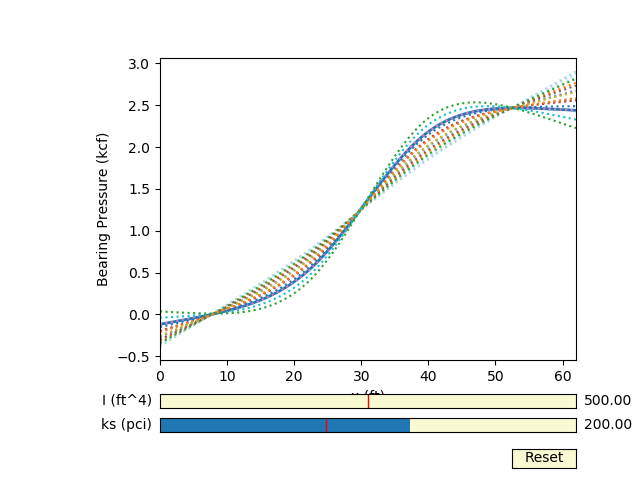

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
plt.xlabel('x (ft)')
plt.ylabel('Bearing Pressure (kcf)')
#t = np.arange(0.0, 1.0, 0.001)
t = x_ft
I0 = 747 #Where the slider starts for Inertia
ks0 = 150 #where the slider starts
delta_ks = 50
s = Rslts[0][4]
#s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
plt.plot(x_ft,Rslts[0][4],x_ft,Rslts[1][4],x_ft,Rslts[2][4],x_ft,Rslts[3][4],linestyle = ':',color='lightblue')
plt.plot(x_ft,Rslts[4][4],x_ft,Rslts[5][4],x_ft,Rslts[6][4],x_ft,Rslts[7][4],linestyle = ':')
plt.plot(x_ft,Rslts[8][4],x_ft,Rslts[9][4],x_ft,Rslts[10][4],x_ft,Rslts[11][4],linestyle = ':') 
plt.plot(x_ft,Rslts[12][4],x_ft,Rslts[13][4],x_ft,Rslts[14][4],x_ft,Rslts[15][4],linestyle = ':') 
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sKs = Slider(axfreq, 'ks (pci)', ks_pci[0], ks_pci[-1], valinit=ks0, valstep=delta_ks)
sI = Slider(axamp, 'I (ft^4)', I_ft4[0], I_ft4[-1], valinit=I0,valstep=100)

N = len(InputRecord)
ksList = [InputRecord[i][4] for i in range(0,N)]
IList =  [float(InputRecord[i][5]) for i in range(0,N)]


def update(val):
    Inrt = sI.val
    ks = sKs.val
    indks = [i for i, x in enumerate(ksList) if x==ks*1.728]
    indI = [i for i, x in enumerate(IList) if x==Inrt]
    intersectIdx = list(set(indks) & set(indI))

    l.set_ydata(Rslts[intersectIdx[0]][4])
    fig.canvas.draw_idle()


sKs.on_changed(update)
sI.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sKs.reset()
    sI.reset()
button.on_clicked(reset)



plt.show()

